In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
import collections
from sklearn.decomposition import PCA

# : Import the four supervised learning models from sklearn

# from sklearn import model_A
from sklearn.linear_model import LogisticRegression

# from sklearn import model_B
from sklearn.svm import SVC

# from skearln import model_C
from sklearn.neighbors import KNeighborsClassifier

# from skearln import model_D
from sklearn.ensemble import AdaBoostClassifier


# from sklearn.cross_validation import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import confusion_matrix

In [23]:
def getData(path):
    # Get data file (csv) from path
    data = pd.read_csv(path, header=0)
    # Process data: get rid of some irrelevant columns
    data.drop("Unnamed: 32", axis=1, inplace=True)
    data.drop("id", axis=1, inplace=True)
    # Print shape of data and first few lines of data
    print data.shape
    print data.head()
    return data

In [24]:
raw_data = getData("/Users/anthonybao/Desktop/datasets/brca/data.csv")
raw_results = raw_data.diagnosis
print raw_data.describe()
# print raw_data.isnull().sum()

(569, 31)
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...        

In [25]:
results = raw_data.diagnosis
malignant_count = results[results=='M'].value_counts()
benign_count =  results[results=='B'].value_counts()
print("Number of patients with malignant tumor: %d" %malignant_count)
print("Number of patients with benign tumor: %d" %benign_count)
print("Malignancy rate: {}%" .format(100*malignant_count[0]/(malignant_count[0]+benign_count[0])))

Number of patients with malignant tumor: 212
Number of patients with benign tumor: 357
Malignancy rate: 37%


In [26]:
def getCommonOutlierRows(data):
    # Outlier detection and removal:
    outlier_indices = []
    for feature in data.keys():
        # Q1: 25th percentile for given feature
        Q1 = np.percentile(data[feature], 25, axis=0)
        # Q3: 75th percentile for given feature
        Q3 = np.percentile(data[feature], 75, axis=0)
        # Outlier step: interquartile range * 1.5
        outlier_step = (Q3-Q1)*1.5
        # Display outliers:
        outlier_points = data[~((data[feature] >= Q1 - outlier_step) & (data[feature] <= Q3 + outlier_step))]
        # print("Outlier data points detected for feature '{}':".format(feature))
        # print(outlier_points)
        outlier_indices.append(outlier_points.index)
    # print outlier_indices

    combined_outlier_indices = []

    # Only combine outliers of first 6 columns
    for i in range(0, 6):
        combined_outlier_indices += (outlier_indices[i].tolist())
    print combined_outlier_indices

    # Find common rows for outliers (rows that have more than 3 outliers)
    common_outlier_rows = ([item for item, count in collections.Counter(combined_outlier_indices).items() if count > 2])
    common_outlier_rows.sort()
    # print common_outlier_rows
    return common_outlier_rows

def removeOutliers(data):
    # Remove results (diagnosis) column from data
    features_data = data.drop(data.columns[0], axis=1, inplace=False)
    common_outlier_rows = getCommonOutlierRows(features_data)
    data.drop(data.index[common_outlier_rows]).reset_index(drop=True)
    return data

In [27]:
data = removeOutliers(raw_data)

[82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503, 521, 219, 232, 239, 259, 265, 455, 562, 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 461, 503, 521, 23, 82, 108, 122, 164, 180, 202, 212, 236, 250, 265, 272, 339, 352, 368, 369, 372, 373, 393, 449, 461, 503, 521, 563, 564, 3, 105, 122, 504, 520, 568, 0, 3, 9, 12, 14, 78, 82, 108, 122, 181, 190, 258, 351, 352, 400, 567]


In [28]:
data1 = data.drop(data.columns[0], axis=1, inplace=False)

print data
print data1

print data.shape

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M       17.990         10.38          122.80     1001.0   
1           M       20.570         17.77          132.90     1326.0   
2           M       19.690         21.25          130.00     1203.0   
3           M       11.420         20.38           77.58      386.1   
4           M       20.290         14.34          135.10     1297.0   
5           M       12.450         15.70           82.57      477.1   
6           M       18.250         19.98          119.60     1040.0   
7           M       13.710         20.83           90.20      577.9   
8           M       13.000         21.82           87.50      519.8   
9           M       12.460         24.04           83.97      475.9   
10          M       16.020         23.24          102.70      797.8   
11          M       15.780         17.89          103.60      781.0   
12          M       19.170         24.80          132.40     1123.0   
13    

In [29]:
def showPCA(data):
    # PCA to find which data dimmensions maximize the variance of features
    pca = PCA()
    pca_results = pca.fit(data)
    # data from first row to last row of column 0
    print("PCA components:\n{}".format(pca.components_[:, 0]))
    type(pca.components_[:, 0])
    print("PCA explained variance ratio:\n{}".format(pca.explained_variance_ratio_[:4] * 100))

    # Try to understand this later:
    plt.figure(figsize=(10, 8))

    # create an x-axis variable for each pca component
    x = np.arange(1, 5)

    # plot the cumulative variance
    plt.plot(x, np.cumsum(pca.explained_variance_ratio_[0:4]), '-o', color='black')

    # plot the components' variance
    plt.bar(x, pca.explained_variance_ratio_[0:4], align='center', alpha=0.5)

    # plot styling
    plt.ylim(0, 1.05)
    plt.annotate('Cumulative\nexplained\nvariance',
                 xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
    for i, j in zip(x, np.cumsum(pca.explained_variance_ratio_[0:4])):
        plt.annotate(str(j.round(2)), xy=(i + .2, j - .02))
    plt.xticks(range(1, 5))
    plt.xlabel('PCA components')
    plt.ylabel('Explained Variance')
    plt.show()

PCA components:
[  5.08623202e-03   9.28705650e-03  -1.23425821e-02  -3.42380473e-02
   3.54561138e-02  -1.31213101e-01   3.35131912e-02  -7.54924585e-02
  -3.50549264e-01   1.39559852e-01  -4.19346972e-01   7.35141931e-01
   2.18087182e-01   8.10260113e-02  -1.37865559e-01  -1.41957144e-01
   4.42129324e-02   8.97292328e-02  -2.10057742e-02  -8.01074429e-02
   5.94747777e-02  -8.72363409e-03  -4.57847381e-03   2.82894830e-02
   3.59617411e-03  -1.60336173e-03  -2.79341068e-03  -3.25869730e-03
  -5.12865809e-04   6.48447162e-04]
PCA explained variance ratio:
[  9.82044672e+01   1.61764899e+00   1.55751075e-01   1.20931964e-02]


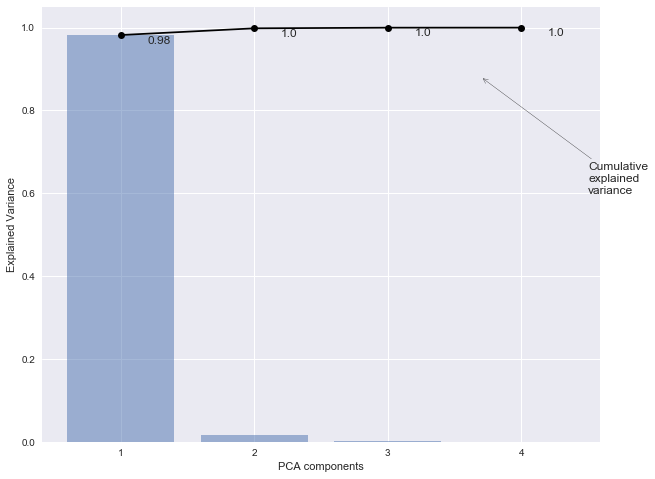

In [30]:
showPCA(data1)

In [31]:
# Split the dataset into test and train data
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data1, data.diagnosis, test_size = 0.3, random_state=seed)

In [32]:
# # : Initialize the four models (before tuning)
clf_A = LogisticRegression()
clf_B = SVC()
clf_C = KNeighborsClassifier(n_neighbors=25,weights='uniform')
clf_D = AdaBoostClassifier(n_estimators=3)

In [33]:
#===================SUPERVISED========================
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    clf.fit(X_train, y_train)


def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label='M')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''

    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(clf, X_train, y_train)

    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [34]:
# print "Classification results without model tuning"
print "Logistic Regression"
print train_predict(clf_A, X_train, y_train, X_test, y_test)
print "SVC"
print train_predict(clf_B, X_train, y_train, X_test, y_test)
print "KNeighbors"
print train_predict(clf_C, X_train, y_train, X_test, y_test)
print "AdaBoost"
print train_predict(clf_D, X_train, y_train, X_test, y_test)

Logistic Regression
Training a LogisticRegression using a training set size of 398. . .
F1 score for training set: 0.9352.
F1 score for test set: 0.9516.
None
SVC
Training a SVC using a training set size of 398. . .
F1 score for training set: 1.0000.
F1 score for test set: 0.0000.
None
KNeighbors
Training a KNeighborsClassifier using a training set size of 398. . .
F1 score for training set: 0.8777.
F1 score for test set: 0.9244.
None
AdaBoost
Training a AdaBoostClassifier using a training set size of 398. . .
F1 score for training set: 0.9252.
F1 score for test set: 0.9032.
None


/Users/anthonybao/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
#===================MODEL COMPARISONS=====================
# SVC
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
def showComparisonForSVCBoundaries(feature1, feature2):
    # feature_cols = list(data.columns[1:3])
    feature_cols = [feature1, feature2]
    X = data[feature_cols]
    print "dagnabbit again"
    print X
    data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
    y = data.diagnosis

    # we create an instance of SVM and fit our data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # # col0 is the column of the first feature we selected (ex: radius_mean)
    # col0 = data.columns[1]
    # # col1 is the column of the second feature we selected (ex: texture_mean)
    # col1 = data.columns[2]

    # X0 is the first feature we selected (ex: radius_mean)
    # X1 is the second feature we selected (ex: texture_mean)
    X0, X1 = data[feature1], data[feature2]
    # print X0
    # print X1
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()
#===================EVALUATE MODELS========================
# Confusion matrix
def showConfusionMatrix(clf, X_test, y_test):
    cm = confusion_matrix(y_test.values, clf.predict(X_test))
    print "HELLO"
    print cm
    TP = cm[1, 1]
    print TP
    TN = cm[0, 0]
    print TN
    FP = cm[0, 1]
    print FP
    FN = cm[1, 0]
    print FN
    print "okey dokey"
    # use float to perform true division, not integer division
    print "accuracy score:"
    accuracy_score = (TP + TN) / float(TP + TN + FP + FN)
    print(accuracy_score)
    # print(metrics.accuracy_score(y_test.values, clf.predict(X_test)))

    print "classification error:"
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print(classification_error)
    # print(1 - metrics.accuracy_score(y_test.values, clf.predict(X_test)))

    print "sensitivity"
    sensitivity = TP / float(FN + TP)
    print(sensitivity)
    # print(metrics.recall_score(y_test.values, clf.predict(X_test)))

    print "specificity"
    specificity = TN / float(TN + FP)
    print(specificity)

    print "false_positive_rate"
    false_positive_rate = FP / float(TN + FP)
    print(false_positive_rate)
    # print(1 - specificity)

    print "precision"
    precision = TP / float(TP + FP)
    print(precision)
    # print(metrics.precision_score(y_test.values, clf.predict(X_test)))


    print "Examining and adjusting classification threshold"
    print clf.predict(X_test)[0:10]
    print clf.predict_proba(X_test)[0:10]
    print clf.predict_proba(X_test)[0:10, 1]
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    plt.rcParams['font.size'] = 12
    plt.hist(y_pred_prob, bins=8)

    # x-axis limit from 0 to 1
    plt.xlim(0, 1)
    plt.title('Histogram of predicted probabilities')
    plt.xlabel('Predicted probability of malignancy')
    plt.ylabel('Frequency')
    plt.show()


    sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')
    return plt

# Learning curve to identify overfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [36]:
#===============MODEL TUNING================
def tuneLogisticRegression():
    # Logistic Regression grid search
    param_grids = {'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.5, 0.725, 0.712, 0.723, 0.727, 1, 10, 100, 1000]}
    clf_A1 = GridSearchCV(cv=10, estimator=LogisticRegression(C=1.0, penalty='l2'),
                          param_grid=param_grids, n_jobs=-1)
    clf_A1.fit(X_train, y_train)
    print (clf_A1.best_params_)
    print (clf_A1.best_score_)
    train_predict(clf_A1, X_train, y_train, X_test, y_test)
    return clf_A1

def evaluateLogisticRegressionModel():

    # clf_A1 = tuneLogisticRegression()

    # Model evaluation visualizations
    # Confusion matrix
    showConfusionMatrix(clf_A1, X_test, y_test)
    # Learning curves
    plot_learning_curve(clf_A,X= X_train.values, y= y_train.values,title= 'Learning Curve-Logistic Regression (before tuning)',cv=10)
    plot_learning_curve(clf_A1.best_estimator_,X= X_train.values, y= y_train.values,title= 'Learning Curve-Logistic Regression (after tuning)',cv=10)

    plt.show()

def tuneSVC():
    # Logistic Regression grid search
    param_grids = {"kernel": ['rbf'],
                   'gamma': [1e-4, 1e-5, 1e-6],
                   'C': [1, 400, 500, 600, 700],
                   }
    clf_B1 = GridSearchCV(clf_B, param_grid=param_grids, cv=10, n_jobs=-1)
    clf_B1.fit(X_train, y_train)
    print (clf_B1.best_params_)
    print (clf_B1.best_score_)
    train_predict(clf_B1, X_train, y_train, X_test, y_test)
    return clf_B1

def evaluateSVCModel():

    # clf_B1 = tuneSVC()

    # Model evaluation visualizations
    # Confusion matrix
    showConfusionMatrix(clf_B1, X_test, y_test)
    # Learning curves
    plot_learning_curve(clf_B,X= X_train.values, y= y_train.values,title= 'Learning Curve-SVC (before tuning)',cv=10)
    plot_learning_curve(clf_B1.best_estimator_,X= X_train.values, y= y_train.values,title= 'Learning Curve-SVC (after tuning)',cv=10)

    plt.show()

def tuneKNN():
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    clf_C1 = GridSearchCV(clf_C, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    clf_C1.fit(X_train, y_train)
    train_predict(clf_C1, X_train, y_train, X_test, y_test)
    print (clf_C1.best_params_)
    print (clf_C1.best_score_)
    return clf_C1

def evaluateKNNModel():

    # clf_C1 = tuneKNN()

    # Model evaluation visualizations
    # Confusion matrix
    showConfusionMatrix(clf_C1, X_test, y_test)
    # Learning curves
    plot_learning_curve(clf_C, X=X_train.values, y=y_train.values,
                        title='Learning Curve-KNN (before tuning)', cv=10)
    plot_learning_curve(clf_C1.best_estimator_, X=X_train.values, y=y_train.values,
                        title='Learning Curve-KNN (after tuning)', cv=10)

    plt.show()

def tuneAdaBoost():
    # Maybe get rid of 50? too good to be true???
    param_grids = {"n_estimators": [1, 2, 3, 4, 5, 10, 50]}
    clf_D1 = GridSearchCV(clf_D, param_grid=param_grids, cv=10, n_jobs=-1)
    clf_D1.fit(X_train, y_train)
    print (clf_D1.best_params_)
    print (clf_D1.best_score_)
    train_predict(clf_D1, X_train, y_train, X_test, y_test)
    return clf_D1

def evaluateAdaBoostModel():
    # param_grid = {"base_estimator__criterion": ["gini", "entropy"],
    #               "base_estimator__splitter": ["best", "random"],
    #               "n_estimators": [1, 2]
    #               }
    #
    # DTC = DecisionTreeClassifier(random_state=11, max_features="auto", class_weight="auto", max_depth=None)
    #
    # ABC = AdaBoostClassifier(base_estimator=DTC)
    #
    # # run grid search
    # clf_D1 = GridSearchCV(ABC, param_grid=param_grid, scoring='roc_auc')

    # clf_D1 = tuneAdaBoost()

    # Model evaluation visualizations
    # Confusion matrix
    showConfusionMatrix(clf_D1, X_test, y_test)
    # Learning curves
    plot_learning_curve(clf_D, X=X_train.values, y=y_train.values,
                        title='Learning Curve-ABC (before tuning)', cv=10)
    plot_learning_curve(clf_D1.best_estimator_, X=X_train.values, y=y_train.values,
                        title='Learning Curve-ABC (after tuning)', cv=10)

    plt.show()
    

{'C': 1000}
0.959798994975
Training a GridSearchCV using a training set size of 398. . .
F1 score for training set: 0.9559.
F1 score for test set: 0.9524.
{'kernel': 'rbf', 'C': 700, 'gamma': 1e-05}
0.949748743719
Training a GridSearchCV using a training set size of 398. . .
F1 score for training set: 0.9728.
F1 score for test set: 0.9600.
Training a GridSearchCV using a training set size of 398. . .
F1 score for training set: 1.0000.
F1 score for test set: 0.9508.
{'n_neighbors': 11, 'weights': 'distance'}
0.917085427136
{'n_estimators': 50}
0.969849246231
Training a GridSearchCV using a training set size of 398. . .
F1 score for training set: 1.0000.
F1 score for test set: 0.9683.
HELLO
[[105   3]
 [  3  60]]
60
105
3
3
okey dokey
accuracy score:
0.964912280702
classification error:
0.0350877192982
sensitivity
0.952380952381
specificity
0.972222222222
false_positive_rate
0.0277777777778
precision
0.952380952381
Examining and adjusting classification threshold
['B' 'M' 'M' 'B' 'B' 'M'

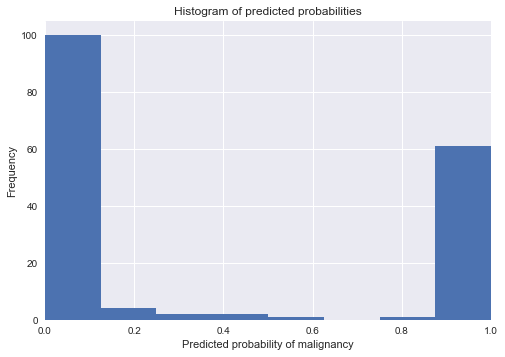

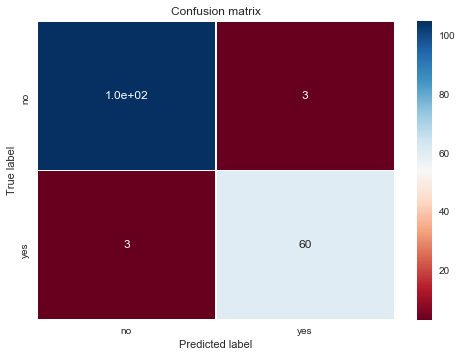

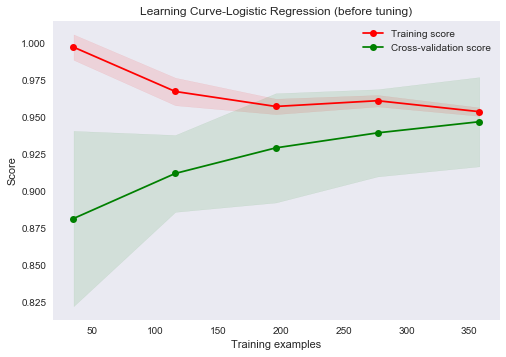

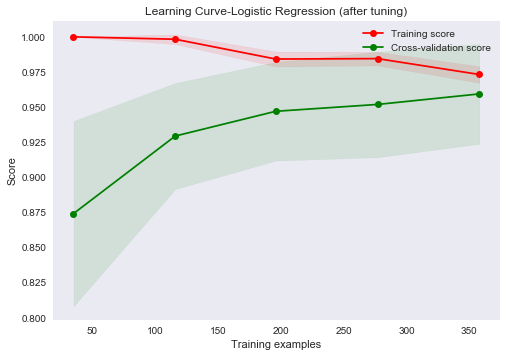

In [37]:
clf_A1 = tuneLogisticRegression()
clf_B1 = tuneSVC()
clf_C1 = tuneKNN()
clf_D1 = tuneAdaBoost()

evaluateLogisticRegressionModel()
